<a href="https://colab.research.google.com/github/DrMiracle/Colab-Projects/blob/main/data%20analysis/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy
import sklearn
import sklearn.decomposition
from matplotlib import pyplot as plt

In [ ]:
class KMeans:
    def __init__(self, n_clusters, max_iterations=1000, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.tol = tol

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for i in range(self.max_iterations):
            self.cluster_labels = self._assign_labels(X)
            new_centroids = self._calculate_centroids(X)

            if np.allclose(self.centroids, new_centroids, atol=self.tol):
                break

            self.centroids = new_centroids

    def predict(self, X):
        return self._assign_labels(X)

    def _assign_labels(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def _calculate_centroids(self, X):
        return np.array([X[self.cluster_labels == k].mean(axis=0) for k in range(self.n_clusters)])


In [ ]:
X = np.random.randn(300,2)

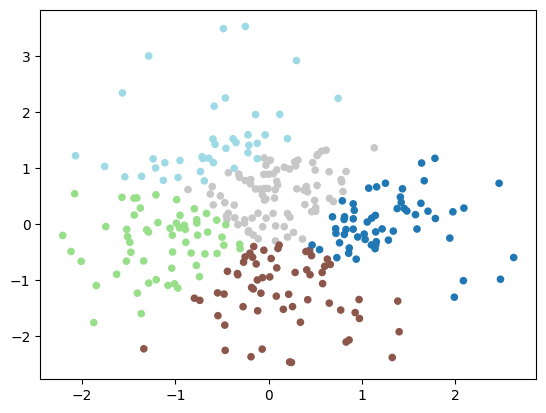

In [ ]:
model = KMeans(5)
model.fit(X)
Y = model.predict(X)
plt.scatter(*X.T,c=Y,s=20,cmap='tab20')
plt.show()